In [1]:
import cv2
import numpy as np

# 영상의 산술 연산

In [7]:
src1 = cv2.imread('./data/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/square.bmp', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 1, src2, 0.3, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 논리 연산

In [3]:
src1 = cv2.imread('./data/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/square.bmp', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src1)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

**(참고) 영상의 이진화

In [42]:
def on_thresh(pos):
    # cv2.threshold(이미지, 임계값, 임계값을 넘었을때 적용할 최대값, 임계값연산방법)
    ret, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

src = cv2.imread('./data/neutrophils.png', cv2.IMREAD_GRAYSCALE)
dst = src.copy()

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.createTrackbar('threshold', 'dst', 0, 255, on_thresh)

cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
# 빈 들판에 비행기 띄우기
airplane = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
field = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 163, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(mask)
field[mask_inv > 0] = airplane[mask_inv > 0]

# cv2.imshow('airplane', airplane)
cv2.imshow('field', field)
# cv2.imshow('gray', gray)
# cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 필터링

## 엠보싱 필터

In [17]:
src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]])

# cv2.filter2D(적용할 이미지, 출력채널수, 필터)
dst = cv2.filter2D(src, -1, emboss, delta = 128)   # -1은 입력 영상과 출력 영상의 채널 깊이 동일
                                                   # 필터링 연산의 결과, 전체 영상의 값이 작아짐
                                                   # delta=128을 통해서 전체 결과에 128을 더해줌
                                                   # 전반적으로 밝게 표시해주는 효과
           
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 블러링

### 평균값 필터

In [18]:
src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

blur = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]], dtype=np.float32) * 1/9

dst = cv2.filter2D(src, -1, blur)
            
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for ksize in (3, 5, 7):
    # cv2.blur(입력영상, 필터사이즈)
    dst = cv2.blur(src, (ksize, ksize))
    desc = 'Mean: %d X %d' % (ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()

### 가우시안 필터

In [34]:
src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for sigma in range(1, 6):
    # cv2.GaussianBlur(입력영상, 커널사이즈, 시그마)
    dst = cv2.GaussianBlur(src, (0, 0), sigma)
    desc = 'Gaussian: sigma %d'% (sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()

## 샤프닝 (영상 날카롭게 하기)

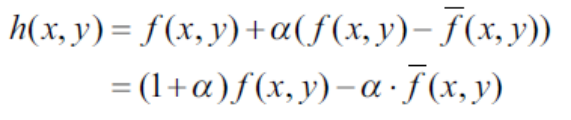

In [3]:
from IPython.display import Image
Image('./images/image4.png')

In [6]:
src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for sigma in range(1, 6):  # sigma가 증감함에 따라 Blur 강도가 커짐 -> 샤프닝 강도가 커짐
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)
    alpha = 1.0
    dst = cv2.addWeighted(src, (1 + alpha), blurred, -alpha, 0)
    desc = "Guassian: sigma %d"%(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

## 가우시안 잡음 모델

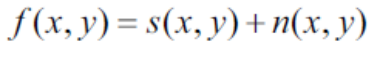

In [4]:
Image('./images/image5.png')

In [2]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for stdev in [10, 20, 30]:
    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, stdev)
    dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)  # 8CU1: 8 bit Unsigned 1 Channel
    desc = "stdev: %d"%(stdev)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()
cv2.destroyAllWindows()

## 양방향 필터

In [18]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 0, 5)
dst = cv2.add(src, noise, dtype=cv2.CV_8UC1) # np.uint8

# 가우시안
dst_gaussian = cv2.GaussianBlur(dst, (0, 0), 5)
# 양방향필터
dst_bilateral = cv2.bilateralFilter(dst, -1, 10, 5)
# sigmaColor : 밝기값의 차이에 따라 에지를 얼마나 보전할지 여부(이 값이 작을수록 에지가 더 보전)
# sigmaSpace : 거리의 차이(필터 사이즈) 기준으로 얼마나 블러링을 강하게 할지 여부(이 값이 클수록 블러링이 강하게 적용)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_gaussian', dst_gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)
cv2.waitKey()    
cv2.destroyAllWindows()

## 미디언 필터

In [7]:
import random

In [17]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# salt & pepper noise(소금 & 후추)

for i in range(0, int(src.size/10)):
    x = random.randint(0, src.shape[0] - 1)
    y = random.randint(0, src.shape[1] - 1)
    src[x, y] =(i % 2) * 255 # i가 짝수일 때는 0(pepper)값이 들어가고, 홀수일 때는 255(salt)값이 들어감

gaussian_blur = cv2.GaussianBlur(src, (0, 0), 1)
median_blur = cv2.medianBlur(src, 3)



cv2.imshow('src', src)
cv2.imshow('gaussian_blur', gaussian_blur)
cv2.imshow('median_blur', median_blur)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 기하학적 변환

## 어파인 변환

In [25]:
src = cv2.imread('./data/tekapo.bmp')

src_pts = np.array([[0, 0], [src.shape[1] - 1, 0], [src.shape[1] - 1, src.shape[0] - 1]], dtype=np.float32)
dst_pts = np.array([[50, 50], [500, 100], [600, 400]], dtype=np.float32)

M = cv2.getAffineTransform(src_pts, dst_pts)  # 2 X 3 변환행렬을 반환
dst = cv2.warpAffine(src, M, (0, 0))   # dsize=(0, 0): 원본 영상과 동일한 사이즈


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 이동 변환

In [28]:
src = cv2.imread('./data/tekapo.bmp')

a = 150  # x축으로 이동할 픽셀 수
b = 100  # y축으로 이동할 픽셀 수

M = np.array([[1, 0, a],
              [0, 1, b]], dtype=np.float32)

dst = cv2.warpAffine(src, M, (0, 0))   # dsize=(0, 0): 원본 영상과 동일한 사이즈


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()